Predicted Label: head cabbage
Predicted Label: head cabbage, Predicted Index: 936


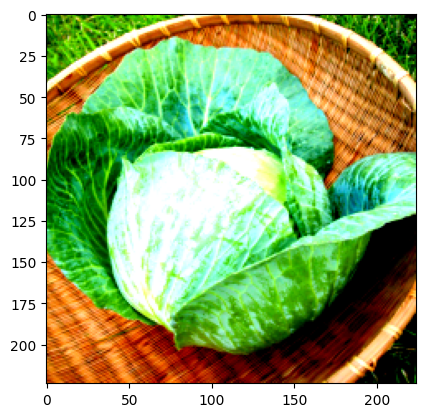

Predicted Label: cucumber
Predicted Label: cucumber, Predicted Index: 943


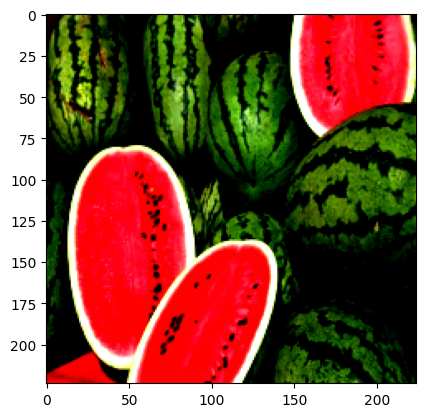

Predicted Label: pineapple
Predicted Label: pineapple, Predicted Index: 953


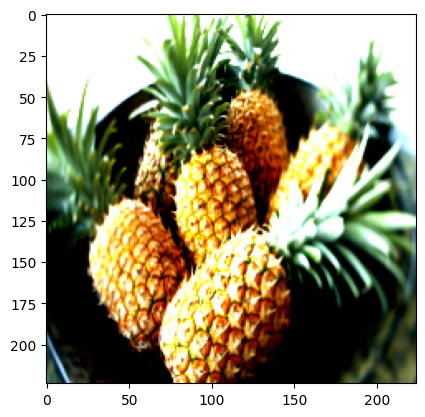

Predicted Label: custard apple
Predicted Label: custard apple, Predicted Index: 956


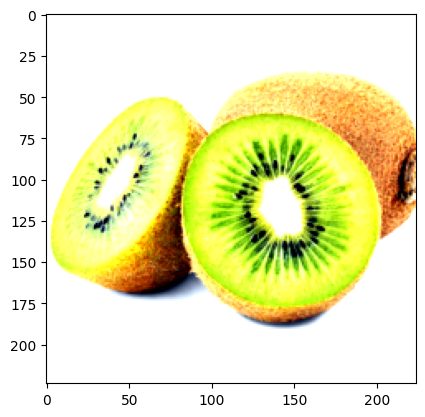

In [10]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests

# Function to load and preprocess image
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)
    return image

# Function to visualize the image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Load pre-trained ResNet model
model = models.resnet18(pretrained=True)
model.eval()  # Set model to evaluation mode

# Fetch ImageNet class labels
url = 'https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt'
response = requests.get(url)
class_labels = response.text.split('\n')[:-1]

# Example images for evaluation
example_images = [
    "/content/Image_1.jpg",
    "/content/Image_2.jpg",
    "/content/Image_3.jpg",
    "/content/Image_4.jpg"
]

# Display example images and predictions
for image_path in example_images:
    image = preprocess_image(image_path)
    output = model(image)
    _, predicted = torch.max(output, 1)
    predicted_idx = predicted.item()

    predicted_class = class_labels[predicted_idx]
    print(f"Predicted Label: {predicted_class}")
    print(f"Predicted Label: {predicted_class}, Predicted Index: {predicted_idx}")

    imshow(image.squeeze())


The second image is watermelon but the predicted label is given as 'cucumber' which leads to missclassification error, same with the fourth image, which is kiwi but the predicted label is given as 'custard apple'. The misclassification errors observed for the four selected classes suggest that the pre-trained ResNet18 model struggled to generalize well to the classes present in the test dataset. This could be due to the differences in features between the ImageNet classes on which the model was trained and the classes in the test dataset. Furthermore, limited or biased training data for the test dataset classes may have also contributed to the misclassifications.

```
# This is formatted as code
```

